In [1]:
!pip install quandl

In [2]:
# Stock data
import quandl
import datetime
# Analyzing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import metrics

In [3]:
df = quandl.get("WIKI/GOOG")

In [287]:
# df_copy = df
df = df_copy
df

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2014-03-27,568.000,568.00,552.92,558.46,13100.0,0.0,1.0,568.000,568.00,552.92,558.46,13100.0
2014-03-28,561.200,566.43,558.67,559.99,41100.0,0.0,1.0,561.200,566.43,558.67,559.99,41100.0
2014-03-31,566.890,567.00,556.93,556.97,10800.0,0.0,1.0,566.890,567.00,556.93,556.97,10800.0
2014-04-01,558.710,568.45,558.71,567.16,7900.0,0.0,1.0,558.710,568.45,558.71,567.16,7900.0
2014-04-02,565.106,604.83,562.19,567.00,146700.0,0.0,1.0,565.106,604.83,562.19,567.00,146700.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-21,1092.740,1106.30,1085.15,1090.88,1640709.0,0.0,1.0,1092.740,1106.30,1085.15,1090.88,1640709.0
2018-03-22,1081.880,1082.90,1045.91,1049.08,2580374.0,0.0,1.0,1081.880,1082.90,1045.91,1049.08,2580374.0
2018-03-23,1047.030,1063.36,1021.22,1021.57,2113497.0,0.0,1.0,1047.030,1063.36,1021.22,1021.57,2113497.0


In [288]:
df = df.dropna()
df = df.iloc[:, 3].values
df


array([ 558.46,  559.99,  556.97, ..., 1021.57, 1053.21, 1005.1 ])

In [289]:
print(type(df))

<class 'numpy.ndarray'>


In [290]:
scaler = preprocessing.StandardScaler()
df = scaler.fit_transform(df.reshape(-1,1))
df = pd.DataFrame(df)


In [291]:
df = df.rename(columns={0: "Close"})

In [292]:
df

,Close
0,-1.013989
1,-1.005308
2,-1.022444
3,-0.964626
4,-0.965534
...,...
1002,2.006916
1003,1.769746
1004,1.613657
1005,1.793179


In [293]:
Next_N_Day = 30
df['GT'] = df[['Close']].shift(-Next_N_Day)

In [294]:
df = df.dropna()
df

,Close,GT
0,-1.013989,-1.239414
1,-1.005308,-1.175923
2,-1.022444,-1.157937
3,-0.964626,-1.194477
4,-0.965534,-1.232322
...,...,...
972,1.948588,2.006916
973,1.766909,1.769746
974,1.496944,1.613657
975,1.694850,1.793179


In [295]:
test_X = df.iloc[-60:, 0].values
test_Y = df.iloc[-60:, 1].values
X = df.iloc[0:len(df),0].values
y = df.iloc[0:len(df),1].values

In [296]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2,random_state = 42)

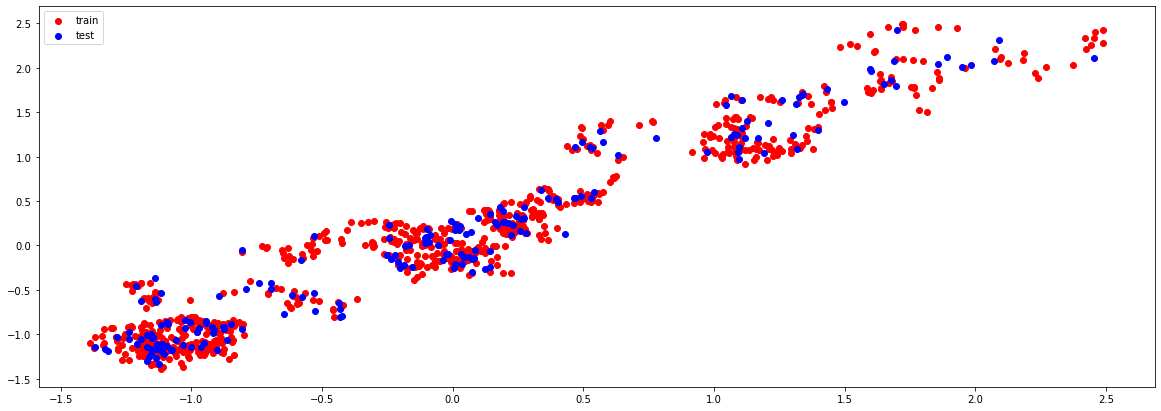

In [297]:
plt.figure(figsize = (20, 7))
plt.scatter(X_train, y_train, marker = 'o', color = 'r')
plt.scatter(X_test, y_test, marker = 'o', color = 'b')
plt.legend(labels = ['train','test'])
plt.show()

In [298]:
c_val = 1000
gmm = 0.1
model_li = LinearRegression()
model_svr_li = SVR(kernel='linear', C=c_val)
model_svr_rbf = SVR(kernel='rbf', C=c_val, gamma=gmm)
model_svr_pol = SVR(kernel='poly', C=c_val, degree=2)
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state = seed, shuffle=True)
score_model_li = model_selection.cross_val_score(model_li, X_train.reshape(-1,1), y_train, cv = kfold)
score_svr_li = model_selection.cross_val_score(model_svr_li, X_train.reshape(-1,1), y_train, cv = kfold)
score_svr_rbf = model_selection.cross_val_score(model_svr_rbf, X_train.reshape(-1,1), y_train, cv = kfold)
score_svr_pol = model_selection.cross_val_score(model_svr_pol, X_train.reshape(-1,1), y_train, cv = kfold)

In [299]:
print(score_model_li)
print(score_svr_li)
print(score_svr_rbf)
print(score_svr_pol)

[0.92504532 0.93476088 0.93515966 0.9352689  0.93702634 0.92394733
 0.9247415  0.9039145  0.93022679 0.93858007]
[0.9222704  0.93458616 0.93544037 0.93315901 0.93653178 0.92081508
 0.92420425 0.90205277 0.93020109 0.93502581]
[0.92425446 0.93650119 0.94036949 0.93625245 0.94285131 0.92250598
 0.92735695 0.90186987 0.93166469 0.93259448]
[-0.12684174  0.149233    0.08598818  0.20479722 -0.01070971  0.13358689
 -0.02611682 -0.14399276  0.09968644 -0.02118776]


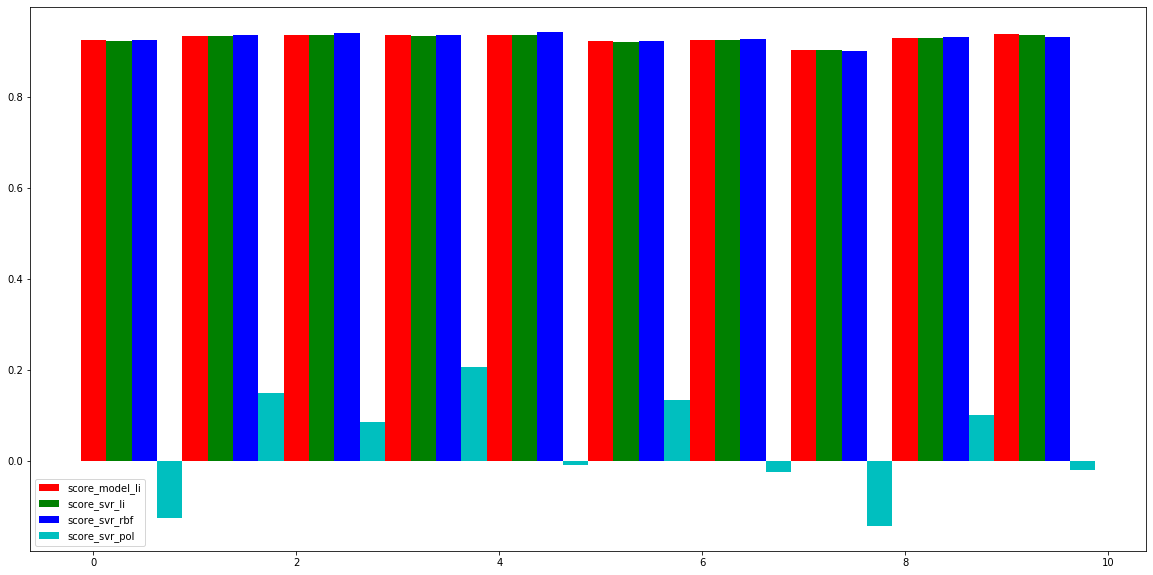

In [300]:
# fig = plt.figure(figsize = (20, 10))

# plt.plot(score_model_li, marker = 'o', color = 'r')
# plt.plot(score_svr_li, marker = 'o', color = 'g')
# plt.plot(score_svr_rbf, marker = 'o', color = 'b')
# plt.plot(score_svr_pol, marker = 'o', color = 'c')
# plt.title('score')
# plt.show()
fig = plt.figure(figsize = (20,10))
arr = np.arange(10)
plt.bar(arr+0, score_model_li, color = 'r', width = 0.25)
plt.bar(arr+0.25, score_svr_li, color = 'g', width = 0.25)
plt.bar(arr+0.5, score_svr_rbf, color = 'b', width = 0.25)
plt.bar(arr+0.75, score_svr_pol, color = 'c', width = 0.25)
plt.legend(labels = ['score_model_li','score_svr_li','score_svr_rbf','score_svr_pol'])
plt.show()

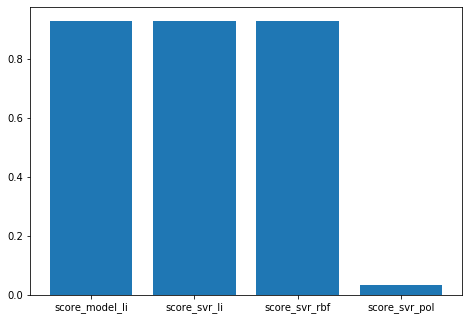

In [301]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['score_model_li', 'score_svr_li', 'score_svr_rbf', 'score_svr_pol']
students = [score_model_li.mean(),score_svr_li.mean(),score_svr_rbf.mean(),score_svr_pol.mean()]
ax.bar(langs,students)
plt.show()

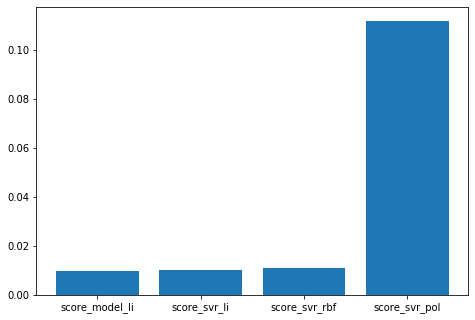

In [302]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['score_model_li', 'score_svr_li', 'score_svr_rbf', 'score_svr_pol']
students = [score_model_li.std(),score_svr_li.std(),score_svr_rbf.std(),score_svr_pol.std()]
ax.bar(langs,students)
plt.show()

In [303]:
model_li.fit(X_train.reshape(-1,1), y_train)
model_svr_li.fit(X_train.reshape(-1,1), y_train)
model_svr_pol.fit(X_train.reshape(-1,1), y_train)
model_svr_rbf.fit(X_train.reshape(-1,1), y_train)

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [304]:
li_pred = model_li.predict(test_X.reshape(-1,1))
svr_li_pred = model_svr_li.predict(test_X.reshape(-1,1))
svr_rbf_pred = model_svr_rbf.predict(test_X.reshape(-1,1))
svr_pol_pred = model_svr_pol.predict(test_X.reshape(-1,1))

li_pred_v = model_li.predict(X_test.reshape(-1,1))
svr_li_pred_v = model_svr_li.predict(X_test.reshape(-1,1))
svr_rbf_pred_v = model_svr_rbf.predict(X_test.reshape(-1,1))
svr_pol_pred_v = model_svr_pol.predict(X_test.reshape(-1,1))

In [305]:
print('Validation')
print('<<mean_squared_error>>')
print('linear')
print(metrics.mean_squared_error(y_test, li_pred_v))
print('svr linear')
print(metrics.mean_squared_error(y_test, svr_li_pred_v))
print('svr rbf')
print(metrics.mean_squared_error(y_test, svr_rbf_pred_v))
print('svr poly')
print(metrics.mean_squared_error(y_test, svr_pol_pred_v))
print('<<r2_score>>')
print('linear')
print(metrics.r2_score(y_test, li_pred_v))
print('svr linear')
print(metrics.r2_score(y_test, svr_li_pred_v))
print('svr rbf')
print(metrics.r2_score(y_test, svr_rbf_pred_v))
print('svr poly')
print(metrics.r2_score(y_test, svr_pol_pred_v))

Validation
<<mean_squared_error>>
linear
0.05897556245948344
svr linear
0.0609613971963176
svr rbf
0.057662017521909095
svr poly
0.8987358556692088
<<r2_score>>
linear
0.9405984442847967
svr linear
0.9385982654337296
svr rbf
0.9419214772418346
svr poly
0.09477238067102467


In [306]:
print('Test')
print('<<mean_squared_error>>')
print('linear')
print(metrics.mean_squared_error(test_Y, li_pred))
print('svr linear')
print(metrics.mean_squared_error(test_Y, svr_li_pred))
print('svr rbf')
print(metrics.mean_squared_error(test_Y, svr_rbf_pred))
print('svr poly')
print(metrics.mean_squared_error(test_Y, svr_pol_pred))
print('<<r2_score>>')
print('linear')
print(metrics.r2_score(test_Y, li_pred))
print('svr linear')
print(metrics.r2_score(test_Y, svr_li_pred))
print('svr rbf')
print(metrics.r2_score(test_Y, svr_rbf_pred))
print('svr poly')
print(metrics.r2_score(test_Y, svr_pol_pred))

Test
<<mean_squared_error>>
linear
0.12096342795718681
svr linear
0.12718676163137768
svr rbf
0.09609655637086896
svr poly
0.7160481924802647
<<r2_score>>
linear
-0.9812375020240014
svr linear
-1.0831683274903545
svr rbf
-0.5739476345256582
svr poly
-10.728020246751893


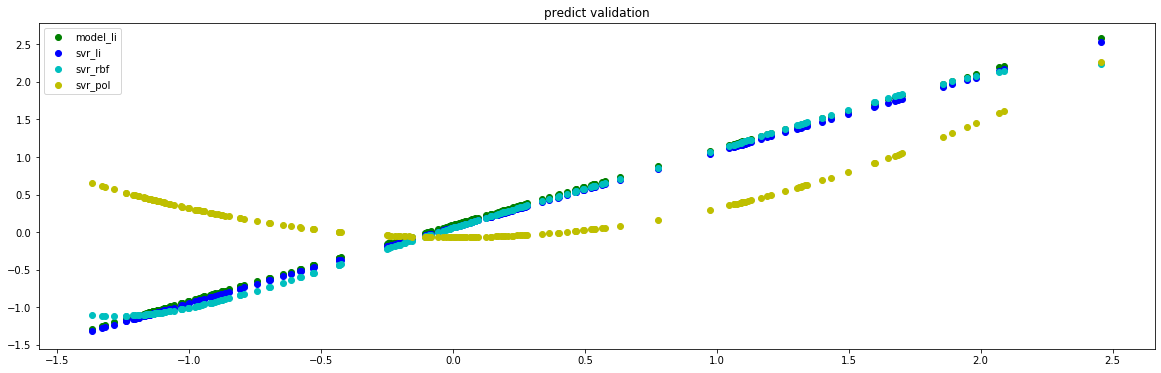

In [307]:
plt.figure(figsize = (20, 6))

plt.scatter(X_test, li_pred_v, color = 'g')
plt.scatter(X_test, svr_li_pred_v, color = 'b')
plt.scatter(X_test, svr_rbf_pred_v, color = 'c')
plt.scatter(X_test, svr_pol_pred_v, color = 'y')
plt.title('predict validation')
plt.legend(labels = ['model_li','svr_li','svr_rbf','svr_pol'])
plt.show()

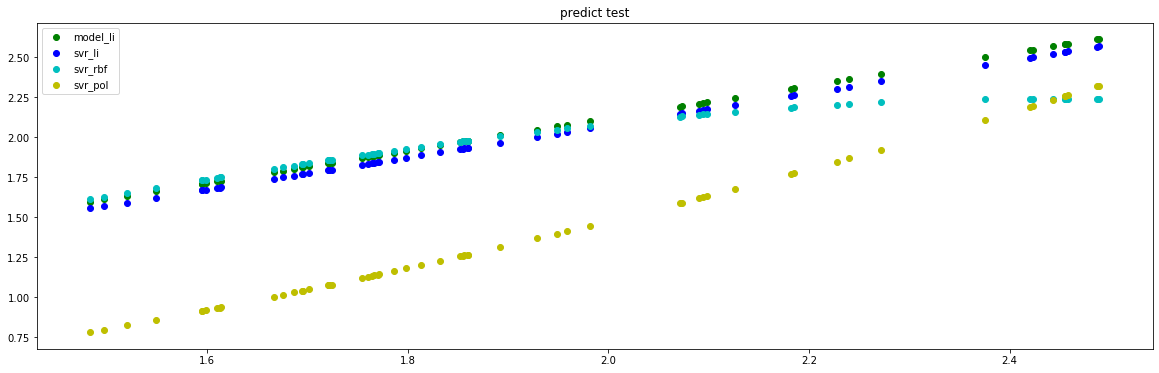

In [308]:
plt.figure(figsize = (20, 6))

plt.scatter(test_X, li_pred, color = 'g')
plt.scatter(test_X, svr_li_pred, color = 'b')
plt.scatter(test_X, svr_rbf_pred, color = 'c')
plt.scatter(test_X, svr_pol_pred, color = 'y')
plt.title('predict test')
plt.legend(labels = ['model_li','svr_li','svr_rbf','svr_pol'])
plt.show()

In [309]:
kernels = ['linear', 'poly', 'rbf'] 
c_param = [0.1, 1, 10 ,100]
gamma = [0.1, 0.5, 1]
tuned_parameters = [{'kernel':kernels, 'C': c_param, 'gamma': gamma}]

In [310]:
model = SVR()
grid = model_selection.GridSearchCV(model, tuned_parameters, cv = kfold)

In [311]:
grid.fit(X_train.reshape(-1,1), y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=7, shuffle=True),
             error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.5, 1],
                          'kernel': ['linear', 'poly', 'rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [312]:
grid.best_params_

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

In [313]:
grid.best_score_

0.947119451223759

In [314]:
validate_pred = grid.predict(X_test.reshape(-1,1))
test_pred = grid.predict(test_X.reshape(-1,1))

In [315]:
print('Validation')
print('<<mean_squared_error>>')
print(metrics.mean_squared_error(y_test, validate_pred))
print('<<r_squared>>')
print(metrics.r2_score(y_test, validate_pred))
print('--------------------')
print('Test')
print('<<mean_squared_error>>')
print(metrics.mean_squared_error(test_Y, test_pred))
print('<<r_squared>>')
print(metrics.r2_score(test_Y, test_pred))

Validation
<<mean_squared_error>>
0.05677635029259887
<<r_squared>>
0.942813541837287
--------------------
Test
<<mean_squared_error>>
0.07924898515024864
<<r_squared>>
-0.2980043971024655


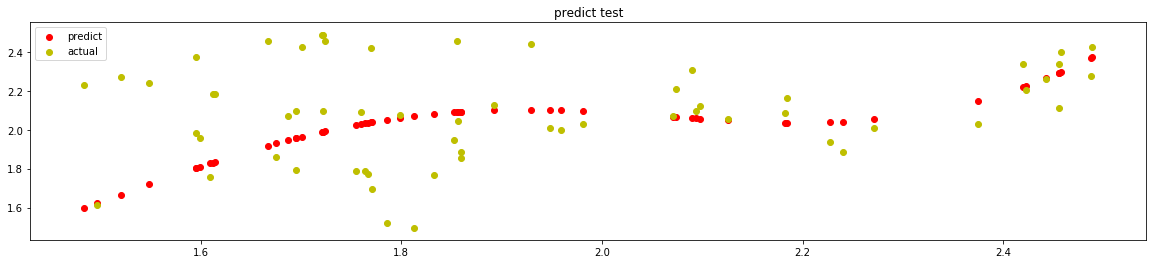

In [316]:
plt.figure(figsize = (20, 4))
plt.scatter(test_X, test_pred, color = 'r')
plt.scatter(test_X, test_Y, color = 'y')
plt.title('predict test')
plt.legend(labels = ['predict','actual'])
plt.show()

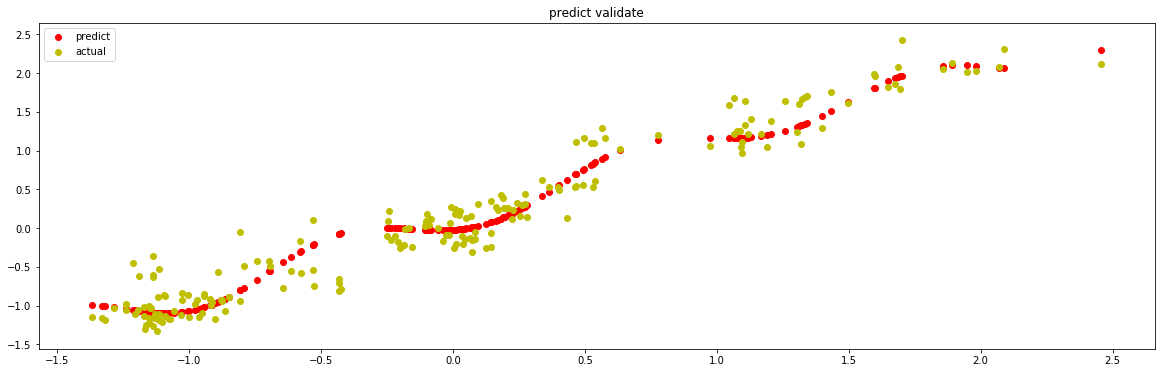

In [317]:
plt.figure(figsize = (20, 6))
plt.scatter(X_test, validate_pred, color = 'r')
plt.scatter(X_test, y_test, color = 'y')
plt.title('predict validate')
plt.legend(labels = ['predict','actual'])
plt.show()

In [318]:
print('zeta 0 : ', model_li.intercept_)
print('zeta 1 : ', model_li.coef_)

zeta 0 :  0.0972503282835951
zeta 1 :  [1.01107588]


In [319]:
print('zeta 0 : ', model_svr_li.intercept_)
print('zeta 1 : ', model_svr_li.coef_)

zeta 0 :  [0.0610624]
zeta 1 :  [[1.00679431]]


In [320]:
test_X

array([1.60991179, 1.67567244, 1.59958526, 1.59555679, 1.68696353,
       1.69530418, 1.72168788, 1.7988531 , 1.76027049, 1.61416722,
       1.61274874, 1.54897396, 1.48378069, 1.52049091, 1.59555679,
       1.6667644 , 1.70148875, 1.7244681 , 1.72095027, 1.72168788,
       1.7701431 , 1.85547876, 1.92895594, 1.89230246, 1.85979093,
       1.85230137, 1.83238593, 1.81320811, 1.77139136, 1.76441245,
       1.75453984, 1.86007463, 1.95925464, 1.98149638, 2.07131443,
       2.09803856, 2.0941803 , 2.07347051, 2.0899816 , 2.18496291,
       2.18212596, 2.24011335, 2.22768748, 2.27149009, 2.37532271,
       2.45566532, 2.4231538 , 2.45793489, 2.4889712 , 2.48749598,
       2.42003315, 2.45549511, 2.44278554, 2.12618117, 1.85638659,
       1.94858768, 1.76690897, 1.49694417, 1.69485027, 1.78597332])

In [321]:
test_Y

array([1.75453984, 1.86007463, 1.95925464, 1.98149638, 2.07131443,
       2.09803856, 2.0941803 , 2.07347051, 2.0899816 , 2.18496291,
       2.18212596, 2.24011335, 2.22768748, 2.27149009, 2.37532271,
       2.45566532, 2.4231538 , 2.45793489, 2.4889712 , 2.48749598,
       2.42003315, 2.45549511, 2.44278554, 2.12618117, 1.85638659,
       1.94858768, 1.76690897, 1.49694417, 1.69485027, 1.78597332,
       1.78688115, 1.88674202, 1.99919899, 2.02915725, 2.07261943,
       2.12300378, 2.09627965, 2.21066574, 2.30689531, 2.16243748,
       2.08549921, 1.88572072, 1.93905551, 2.00719921, 2.03063247,
       2.11335813, 2.20618335, 2.39932336, 2.42462902, 2.27523488,
       2.33946358, 2.33997423, 2.26139053, 2.0576403 , 2.04566834,
       2.00691551, 1.76974593, 1.61365657, 1.79317919, 1.52020722])